In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000,64)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=20))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=c0adf3b108452ac6496441c66a25833bfc223bb15304447145fac644eedae064
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad_sequences


In [ ]:
from keras_preprocessing.sequence import pad_sequences

In [ ]:
import keras

In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten , Dense, Embedding
from keras.utils.data_utils import pad_sequences


max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
(train_data,train_labels), (test_data,tesr_labels)=imdb.load_data(num_words=10000)


x_train = keras.utils.pad_sequences(x_train,maxlen=maxlen)
x_test = keras.utils.pad_sequences(x_test,maxlen=maxlen)


model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.6644 - acc: 0.6320 - val_loss: 0.6073 - val_acc: 0.7026
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5320 - acc: 0.7513 - val_loss: 0.5207 - val_acc: 0.7300
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4599 - acc: 0.7876 - val_loss: 0.4969 - val_acc: 0.7480
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4248 - acc: 0.8074 - val_loss: 0.4930 - val_acc: 0.7548
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4010 - acc: 0.8194 - val_loss: 0.4947 - val_acc: 0.7548
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3817 - acc: 0.8303 - val_loss: 0.4973 - val_acc: 0.7584
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3639 - acc: 0.8395 - val_loss: 0.5012 - val_acc: 0.7552
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

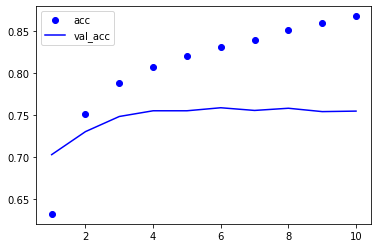

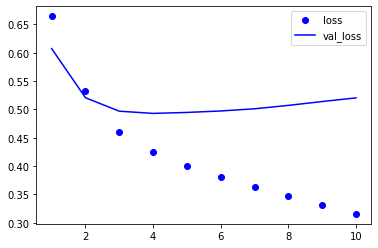

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.legend()

plt.show()

In [ ]:
import jieba

text="I am going to the United States"
cut=jieba.cut(text)
sent=list(cut)
print(sent)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.797 seconds.
DEBUG:jieba:Loading model cost 2.797 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['I', ' ', 'am', ' ', 'going', ' ', 'to', ' ', 'the', ' ', 'United', ' ', 'States']


In [ ]:
Sent ="I will go to United States"
lst_sent=Sent.split(" ")
of_biagram_in = []
for i in range(len(lst_sent)-1):
  of_biagram_in.append(lst_sent[i]+" "+lst_sent[i + 1])

print(of_biagram_in)

['I will', 'will go', 'go to', 'to United', 'United States']


In [ ]:
from string import punctuation
import re
punctuation_pattern = re.compile(r"" "[.,!? ""]"" ")
sent="I will go to United States"
no_punctuation_sent = re.sub(punctuation_pattern," ",sent)
lst_sent = no_punctuation_sent.split(" ")
trigram=[]
for i in range(len(lst_sent)- 2):
  trigram.append(lst_sent[i] + " " + lst_sent[i + 1] + " " + lst_sent[i + 2])

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)

data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


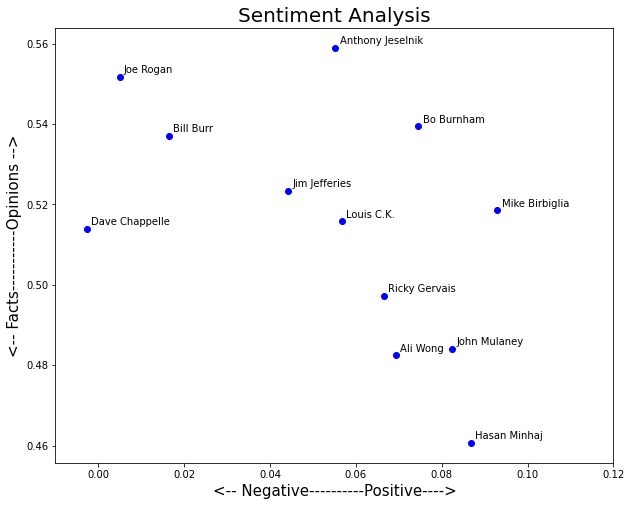

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index,comedian in enumerate(data.index):
  x = data.polarity.loc[comedian]
  y = data.subjectivity.loc[comedian]
  plt.scatter(x,y,color='blue')
  plt.text(x+.001, y+.001, data['full_name'][index],fontsize=10)
  plt.xlim(-.01,.12)

plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('<-- Negative----------Positive---->', fontsize=15)
plt.ylabel('<-- Facts-----------Opinions -->',fontsize=15)

plt.show()